In [10]:
# ! pip install flatland-rl
# ! pip flatland-demo # show demonstration
# ! python <<EOF # random agent
from helper import *

In [11]:
rail_generator = sparse_rail_generator(max_num_cities=10)

env = RailEnv(
    width=30, 
    height=30, 
    number_of_agents=1,
    rail_generator=rail_generator,
    line_generator=sparse_line_generator(),
    obs_builder_object=GlobalObsForRailEnv(),
    )
obs = env.reset()
while True:
    obs, rew, done, info = env.step({
            0: np.random.randint(0, 5),
            1: np.random.randint(0, 5)
        })
    if done:
        break

In [12]:
import PIL
from flatland.utils.rendertools import RenderTool
from IPython.display import clear_output


# Render the environment
def render_env(env,wait=True):
    
    env_renderer = RenderTool(env, gl="PILSVG")
    env_renderer.render_env()

    image = env_renderer.get_image()
    pil_image = PIL.Image.fromarray(image)
    clear_output(wait=True)
    display(pil_image)

# Random Agent

In [13]:
class RandomController:
    def __init__(self, action_size):
        self.action_size = action_size

    def act(self, observations):
        actions = dict()
        for agent_handle, observation in enumerate(observations):
            action = np.random.randint(self.action_size)
            actions.update({agent_handle: action})
        return actions

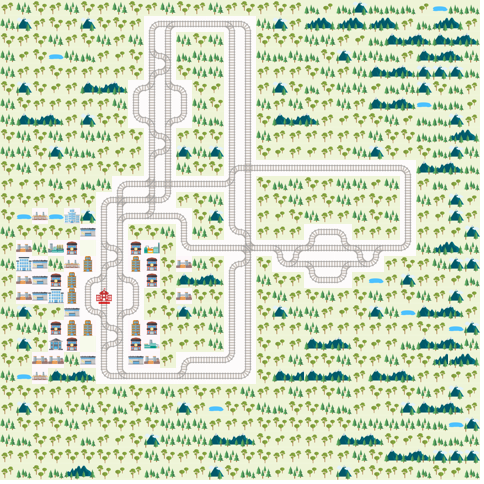

(30, 30, 16)

Rewards for each agent: {0: 0}


In [14]:
from flatland.envs.rail_env import RailEnvActions

random_env = env

controller = RandomController(random_env.action_space[0])
observations, info = random_env.reset()
render_env(random_env)
actions = controller.act(observations)

# Perform a single action per agent
# 0B = Do nothing
# 1L = Left
# 2F = Forward
# 3R = Right 
# 4S = Stop

trans2 = {"0000000000000000" : "empty cell - Case 0",
        "1000000000100000" : "Case 1 - straight",
        "1001001000100000" : "Case 2 - simple switch",
        "1000010000100001" : "Case 3 - diamond drossing",
        "1001011000100001" : "Case 4 - single slip",
        "1100110000110011" : "Case 5 - double slip",
        "0101001000000010" : "Case 6 - symmetrical",
        "0010000000000000" : "Case 7 - dead end",
        "0100000000000010" : "Case 1b (8)  - simple turn right",
        "0001001000000000" : "Case 1c (9)  - simple turn left",
        "1100000000100010" : "Case 2b (10) - simple switch mirrored"}

trans = {
        "1001001000100000" : " s ",
        "1000010000100001" : " d ",
        "1001011000100001" : " 1 ",
        "1100110000110011" : " 2",
        "0101001000000010" : " = ",
        "0000000000000000" : " ▢ ",
        "1000000000100000" : " | ",
        "0000010000000001" : " - ",
        "0010000000000000" : " x ",
        "0100000000000010" : " ┏ ",
        "0001001000000000" : " ┓ ",
        "0000000001001000" : " ┗ ",
        "0000100000010000" : " ┛ ",
        "0101011000000011" : " T ",
        "1100000000100010" : " M "
        }

# "0100 0000 0000 0010" : " ┏ ",
# "dddd llll uuuu rrrr"
# "urdl"

# Channel 0: one-hot representation of the self agent position and direction
# Channel 1: other agents’ positions and direction
# Channel 2: self and other agents’ malfunctions
# Channel 3: self and other agents’ fractional speeds
# Channel 4: number of other agents ready to depart from that position

for (handle, action) in actions.items():
    #print('Agent {} will perform action {} ({})'.format(handle, action, RailEnvActions.to_char(action)))
    next_obs, all_rewards, dones, info = random_env.step({handle: action})
    # print(next_obs.get(handle))
    
    #print map
    out = ""
    # for i in range(30):
    #     for j in range(30):
    #         obs = "".join(str(int(e)) for e in next_obs.get(handle)[0][i][j])
    #         if obs in trans:
    #             type = trans[obs]
    #         else:
    #             type = " ? "
    #         out += type
    #     out += "\n"
    
    print(next_obs.get(handle)[0].shape)

print(out)


print('Rewards for each agent: {}'.format(all_rewards))
# print('Done for each agent: {}'.format(dones))
# print('Misc info: {}'.format(info))

In [15]:
TRANSITION_MAPS = 0
AGENT_STATES = 1
AGENT_TARGETS = 2

MY_POS_DIR = 0
OTHER_POS_DIR = 1
MALFUNCTIONS = 2
FRAC_SPEEDS = 3
NUM_AGENTS_WITH_ME = 4

NOTHING = 0
LEFT = 1
FOWARD = 2
RIGHT = 3
STOP = 4

# Left, Forward, Right and Backward
#print(next_obs.get(0)[AGENT_STATES])
# agent_id = 0

# dir  = next_obs.get(agent_id)[AGENT_STATES].T[MY_POS_DIR].T
# pos = (0,0)
# for i in range(30):
#     for j in range(30):
#         if dir[i][j] != -1:
#             pos = (i,j)

# mal = next_obs.get(agent_id)[AGENT_STATES].T[MALFUNCTIONS].T
# print(mal)

# frac = next_obs.get(0)[AGENT_STATES].T[NUM_AGENTS_WITH_ME].T
# #print(frac)


In [19]:
# dir  = next_obs.get(0)[AGENT_STATES].T[0]
# out = ""
# for i in range(30):
#     for j in range(30):
#         if dir[i][j] == -1:
#             out += " ▢ "
#         else: out += " "+str(int(dir[i][j]))+" "
#     out += "\n"
# print(out)

In [28]:
action_map = {
    NOTHING: "nothing",
    LEFT: "left",
    FOWARD: "foward",
    RIGHT: "right",
    STOP: "stop"
}

def run_episode(env):
    rewards = []
    controller = RandomController(env.action_space[0])
    observations, info = env.reset()

    score = 0
    actions = dict()

    for step in range(100):

        #actions = controller.act(observations)
        actions = {0:STOP}
        next_observations, all_rewards, dones, info = env.step(actions)
        for agent_handle in env.get_agent_handles():
            score += all_rewards[agent_handle]

        #render_env(env)
        #print('Timestep {}, action = {}, total score = {}'.format(step, action_map[actions[agent_handle]], score))
        rewards.append(all_rewards)

        if dones['__all__']:
            print('All done!')
            print(rewards)
            return
        
    print(rewards)

    print("Episode didn't finish after 50 timesteps.")

In [37]:
print(env.agents[0].earliest_departure)
print(env.agents[0].latest_arrival)
run_episode(random_env)

5
73
[{0: 0}, {0: 0}, {0: 0}, {0: 0}, {0: 0}, {0: 0}, {0: 0}, {0: 0}, {0: 0}, {0: 0}, {0: 0}, {0: 0}, {0: 0}, {0: 0}, {0: 0}, {0: 0}, {0: 0}, {0: 0}, {0: 0}, {0: 0}, {0: 0}, {0: 0}, {0: 0}, {0: 0}, {0: 0}, {0: 0}, {0: 0}, {0: 0}, {0: 0}, {0: 0}, {0: 0}, {0: 0}, {0: 0}, {0: 0}, {0: 0}, {0: 0}, {0: 0}, {0: 0}, {0: 0}, {0: 0}, {0: 0}, {0: 0}, {0: 0}, {0: 0}, {0: 0}, {0: 0}, {0: 0}, {0: 0}, {0: 0}, {0: 0}, {0: 0}, {0: 0}, {0: 0}, {0: 0}, {0: 0}, {0: 0}, {0: 0}, {0: 0}, {0: 0}, {0: 0}, {0: 0}, {0: 0}, {0: 0}, {0: 0}, {0: 0}, {0: 0}, {0: 0}, {0: 0}, {0: 0}, {0: 0}, {0: 0}, {0: 0}, {0: 0}, {0: 0}, {0: 0}, {0: 0}, {0: 0}, {0: 0}, {0: 0}, {0: 0}, {0: 0}, {0: 0}, {0: 0}, {0: 0}, {0: 0}, {0: 0}, {0: 0}, {0: 0}, {0: 0}, {0: 0}, {0: 0}, {0: 0}, {0: 0}, {0: 0}, {0: 0}, {0: 0}, {0: 0}, {0: 0}, {0: 0}, {0: 0}]
Episode didn't finish after 50 timesteps.


In [30]:
from flatland.envs.observations import TreeObsForRailEnv
from flatland.envs.rail_env import RailEnv
from flatland.envs.rail_generators import sparse_rail_generator
from flatland.envs.line_generators import sparse_line_generator
from flatland.envs.predictions import ShortestPathPredictorForRailEnv
from flatland.utils.rendertools import RenderTool
from IPython.display import clear_output
%matplotlib inline

In [ ]:
def min_gt(seq, val):
    """
    Return smallest item in seq for which item > val applies.
    None is returned if seq was empty or all items in seq were >= val.
    """
    min = np.inf
    idx = len(seq) - 1
    while idx >= 0:
        if seq[idx] >= val and seq[idx] < min:
            min = seq[idx]
        idx -= 1
    return min

# Ordered Agent

In [ ]:
class OrderedAgent:

    def __init__(self):
        self.action_size = 5

    def act(self, state, eps=0):
        """
        :param state: input is the observation of the agent
        :return: returns an action
        """
        distance = []
        for direction in TreeObsForRailEnv.tree_explored_actions_char:
            try:
                distance.append(state.childs[direction].dist_min_to_target)
            except:
                distance.append(np.inf)
        distance = np.array(distance)
        min_dist = min_gt(distance, 0)
        min_direction = np.where(distance == min_dist)
        if len(min_direction[0]) > 1:
            return min_direction[0][-1] + 1
        return min_direction[0][0] + 1

In [ ]:
np.random.seed(2)
x_dim = 30  # np.random.randint(8, 20)
y_dim = 30  # np.random.randint(8, 20)
n_agents = 30  # np.random.randint(3, 8)
n_goals = n_agents + np.random.randint(0, 3)
min_dist = int(0.75 * min(x_dim, y_dim))

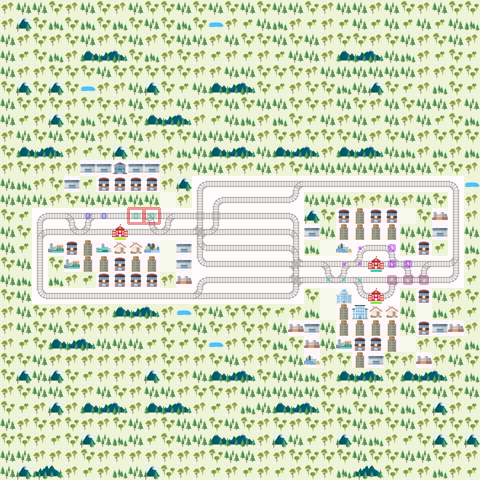

In [ ]:
env = RailEnv(width=x_dim,
              height=y_dim,
              rail_generator=sparse_rail_generator(),
              line_generator=sparse_line_generator(),
              obs_builder_object=TreeObsForRailEnv(max_depth=1,
              predictor=ShortestPathPredictorForRailEnv()),
              number_of_agents=n_agents)
env.reset()
render_env(env)

In [ ]:
def run_episode(env, agent, render = True):

    env_renderer = RenderTool(env)
    max_steps = 100 * (env.height + env.width)-1
    action_dict = dict()
    # Reset environment
    obs, info = env.reset(regenerate_rail = False,regenerate_schedule = False)
    done = env.dones
    env_renderer.reset()
    frame_step = 0
    score = 0
    # Run episode
    for step in range(max_steps):

        # Action
        acting_agent = 30
        for a in range(env.get_num_agents()):
            if done[a]:
                acting_agent += 1
            if a == acting_agent:
                action = agent.act(obs[a])
            else:
                action = 4
            action_dict.update({a: action})
        # Environment step

        obs, all_rewards, done, _ = env.step(action_dict)
        for agent_handle in env.get_agent_handles():
            score += all_rewards[agent_handle]
        print('Timestep {}, total score = {}'.format(step, score))


        if done['__all__']:
            print('All done')
            break

        # Render
        if render:
            render_env(env)
        else:
            clear_output()

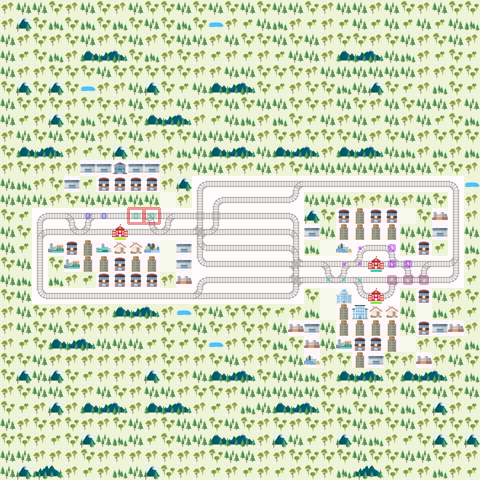

Timestep 58, total score = -822
All done


In [ ]:
run_episode(env,OrderedAgent())

# DQN

In [ ]:
import tensorflow as tf
from tensorflow import keras

## DQN Network

In [ ]:
class DQNNetwork:
    def __init__(self):
        self.action_size = 5
        self.input_shape = (16200,)

    # structure of observation: Transition maps + Agent states (only pos_dir for the moment) + Agent target
    # obs size: h x w x (16 + 1 + 1) = 30 x 30 x 18 = 16200
    def create_q_model(self):
        model = tf.keras.Sequential([
            tf.keras.layers.Dense(256, input_shape=self.input_shape, activation='relu'),
            tf.keras.layers.Dense(self.action_size, activation='linear')
        ])

        optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
        model.compile(loss='mse', optimizer=optimizer)

        return model


## DQN Agent

In [ ]:
class DQNAgent:

    def __init__(self):
        self.action_size = 5
        self.agent_id = 0
        
        network = DQNNetwork()
        # The first model makes the predictions for Q-values which are used to
        # make a action.
        model = network.create_q_model()
        # Build a target model for the prediction of future rewards.
        # The weights of a target model get updated every 10000 steps thus when the
        # loss between the Q-values is calculated the target Q-value is stable.
        model_target = network.create_q_model()

    def train(self): #self, env, num_episodes, max_steps, batch_size, gamma, eps_start, eps_end, eps_decay
        
        dqn = DQNNetwork()
        model = dqn.create_q_model()
        
        
        for i in range(100):
            env.reset()
            next_obs, all_rewards, dones, info = env.step({self.agent_id: NOTHING})
            actions = []
            
            while(not dones.get(self.agent_id)):
            
                state = self.pepare_obs(next_obs)
                
                q_table = model.predict(state)
                print(q_table)
                action = q_table[self.agent_id].argmax()
                actions.append(action)
                
                next_obs, all_rewards, dones, info = env.step({self.agent_id: action})
            
            model.fit(state, q_table, epochs=1, verbose=0)
            
            print("actions: " + str(actions))
            print("rewards: " + str(all_rewards))
    
    def pepare_obs(self,next_obs):
        my_obs = next_obs.get(self.agent_id)
        map = my_obs[TRANSITION_MAPS].flatten()
        pos_dir = my_obs[AGENT_STATES].T[MY_POS_DIR].T.flatten()
        target = my_obs[AGENT_TARGETS].T[0].T.flatten()
        
        return np.concatenate((map, pos_dir, target)).reshape(1,16200)
        
    
    def act(self, state, eps=0):
        """
        :param state: input is the observation of the agent
        :return: returns an action
        """

        distance = []
        for direction in TreeObsForRailEnv.tree_explored_actions_char:
            try:
                distance.append(state.childs[direction].dist_min_to_target)
            except:
                distance.append(np.inf)
        distance = np.array(distance)
        min_dist = min_gt(distance, 0)
        min_direction = np.where(distance == min_dist)
        if len(min_direction[0]) > 1:
            return min_direction[0][-1] + 1
        return min_direction[0][0] + 1
    
agent = DQNAgent()
agent.train()

1/1 [==============================] - 0s 38ms/step
[[ 0.15328074 -0.07846305 -0.5748638  -0.00809705 -0.5833617 ]]
1/1 [==============================] - 0s 20ms/step
[[ 0.15328074 -0.07846305 -0.5748638  -0.00809705 -0.5833617 ]]
1/1 [==============================] - 0s 20ms/step
[[ 0.15328074 -0.07846305 -0.5748638  -0.00809705 -0.5833617 ]]
1/1 [==============================] - 0s 20ms/step
[[ 0.15328074 -0.07846305 -0.5748638  -0.00809705 -0.5833617 ]]
1/1 [==============================] - 0s 19ms/step
[[ 0.15328074 -0.07846305 -0.5748638  -0.00809705 -0.5833617 ]]
1/1 [==============================] - 0s 20ms/step
[[ 0.15328074 -0.07846305 -0.5748638  -0.00809705 -0.5833617 ]]
1/1 [==============================] - 0s 19ms/step
[[ 0.15328074 -0.07846305 -0.5748638  -0.00809705 -0.5833617 ]]
1/1 [==============================] - 0s 20ms/step
[[ 0.15328074 -0.07846305 -0.5748638  -0.00809705 -0.5833617 ]]
1/1 [==============================] - 0s 20ms/step
[[ 0.15328074 -0.078

/Users/Marvin/opt/miniconda3/lib/python3.9/site-packages/flatland/envs/rail_generators.py:350: UserWarning: Could not set all required cities! Created 1/4
  warnings.warn(city_warning)
/Users/Marvin/opt/miniconda3/lib/python3.9/site-packages/flatland/envs/rail_generators.py:262: UserWarning: [WARNING] Changing to Grid mode to place at least 2 cities.
  warnings.warn("[WARNING] Changing to Grid mode to place at least 2 cities.")


[[ 0.00918798  0.27511966 -0.9355299   0.28464043 -0.6930457 ]]
1/1 [==============================] - 0s 19ms/step
[[ 0.00918798  0.27511966 -0.9355299   0.28464043 -0.6930457 ]]
1/1 [==============================] - 0s 18ms/step
[[ 0.00757865  0.24270764 -0.9131039   0.29366925 -0.6972961 ]]
1/1 [==============================] - 0s 19ms/step
[[ 0.0197923   0.21697599 -0.9431572   0.2896908  -0.7073042 ]]
1/1 [==============================] - 0s 18ms/step
[[ 0.00505683  0.24403346 -0.9143859   0.28567025 -0.6869228 ]]
1/1 [==============================] - 0s 19ms/step
[[ 0.01220182  0.25189823 -0.95795447  0.2800101  -0.70455694]]
1/1 [==============================] - 0s 19ms/step
[[ 0.01267307  0.255853   -0.91900045  0.25947937 -0.69602346]]
1/1 [==============================] - 0s 20ms/step
[[-0.03617118  0.2313779  -0.90688777  0.285871   -0.7160252 ]]
1/1 [==============================] - 0s 19ms/step
[[ 0.00141474  0.24902785 -0.90806353  0.2791622  -0.69272214]]
1/1 [===

/Users/Marvin/opt/miniconda3/lib/python3.9/site-packages/flatland/envs/rail_generators.py:350: UserWarning: Could not set all required cities! Created 2/4
  warnings.warn(city_warning)


1/1 [==============================] - 0s 19ms/step
[[ 0.19748019  0.1743255  -0.7419196  -0.09528827 -0.74608785]]
1/1 [==============================] - 0s 18ms/step
[[ 0.19748019  0.1743255  -0.7419196  -0.09528827 -0.74608785]]
1/1 [==============================] - 0s 18ms/step
[[ 0.19748019  0.1743255  -0.7419196  -0.09528827 -0.74608785]]
1/1 [==============================] - 0s 22ms/step
[[ 0.19748019  0.1743255  -0.7419196  -0.09528827 -0.74608785]]
1/1 [==============================] - 0s 19ms/step
[[ 0.19748019  0.1743255  -0.7419196  -0.09528827 -0.74608785]]
1/1 [==============================] - 0s 18ms/step
[[ 0.19748019  0.1743255  -0.7419196  -0.09528827 -0.74608785]]
1/1 [==============================] - 0s 17ms/step
[[ 0.19748019  0.1743255  -0.7419196  -0.09528827 -0.74608785]]
1/1 [==============================] - 0s 19ms/step
[[ 0.19748019  0.1743255  -0.7419196  -0.09528827 -0.74608785]]
1/1 [==============================] - 0s 18ms/step
[[ 0.19748019  0.174

## Training

In [ ]:
# In the Deepmind paper they use RMSProp however then Adam optimizer
# improves training time
optimizer = keras.optimizers.Adam(learning_rate=0.00025, clipnorm=1.0)

# Experience replay buffers
action_history = []
state_history = []
state_next_history = []
rewards_history = []
done_history = []
episode_reward_history = []
running_reward = 0
episode_count = 0
frame_count = 0
# Number of frames to take random action and observe output
epsilon_random_frames = 50000
# Number of frames for exploration
epsilon_greedy_frames = 1000000.0
# Maximum replay length
# Note: The Deepmind paper suggests 1000000 however this causes memory issues
max_memory_length = 100000
# Train the model after 4 actions
update_after_actions = 4
# How often to update the target network
update_target_network = 10000
# Using huber loss for stability
loss_function = keras.losses.Huber()

In [ ]:
while True:  # Run until solved
    state = np.array(env.reset())
    episode_reward = 0

    for timestep in range(1, max_steps_per_episode):
        # env.render(); Adding this line would show the attempts
        # of the agent in a pop up window.
        frame_count += 1

        # Use epsilon-greedy for exploration
        if frame_count < epsilon_random_frames or epsilon > np.random.rand(1)[0]:
            # Take random action
            action = np.random.choice(num_actions)
        else:
            # Predict action Q-values
            # From environment state
            state_tensor = tf.convert_to_tensor(state)
            state_tensor = tf.expand_dims(state_tensor, 0)
            action_probs = model(state_tensor, training=False)
            # Take best action
            action = tf.argmax(action_probs[0]).numpy()

        # Decay probability of taking random action
        epsilon -= epsilon_interval / epsilon_greedy_frames
        epsilon = max(epsilon, epsilon_min)

        # Apply the sampled action in our environment
        state_next, reward, done, _ = env.step(action)
        state_next = np.array(state_next)

        episode_reward += reward

        # Save actions and states in replay buffer
        action_history.append(action)
        state_history.append(state)
        state_next_history.append(state_next)
        done_history.append(done)
        rewards_history.append(reward)
        state = state_next

        # Update every fourth frame and once batch size is over 32
        if frame_count % update_after_actions == 0 and len(done_history) > batch_size:

            # Get indices of samples for replay buffers
            indices = np.random.choice(range(len(done_history)), size=batch_size)

            # Using list comprehension to sample from replay buffer
            state_sample = np.array([state_history[i] for i in indices])
            state_next_sample = np.array([state_next_history[i] for i in indices])
            rewards_sample = [rewards_history[i] for i in indices]
            action_sample = [action_history[i] for i in indices]
            done_sample = tf.convert_to_tensor(
                [float(done_history[i]) for i in indices]
            )

            # Build the updated Q-values for the sampled future states
            # Use the target model for stability
            future_rewards = model_target.predict(state_next_sample)
            # Q value = reward + discount factor * expected future reward
            updated_q_values = rewards_sample + gamma * tf.reduce_max(
                future_rewards, axis=1
            )

            # If final frame set the last value to -1
            updated_q_values = updated_q_values * (1 - done_sample) - done_sample

            # Create a mask so we only calculate loss on the updated Q-values
            masks = tf.one_hot(action_sample, num_actions)

            with tf.GradientTape() as tape:
                # Train the model on the states and updated Q-values
                q_values = model(state_sample)

                # Apply the masks to the Q-values to get the Q-value for action taken
                q_action = tf.reduce_sum(tf.multiply(q_values, masks), axis=1)
                # Calculate loss between new Q-value and old Q-value
                loss = loss_function(updated_q_values, q_action)

            # Backpropagation
            grads = tape.gradient(loss, model.trainable_variables)
            optimizer.apply_gradients(zip(grads, model.trainable_variables))

        if frame_count % update_target_network == 0:
            # update the the target network with new weights
            model_target.set_weights(model.get_weights())
            # Log details
            template = "running reward: {:.2f} at episode {}, frame count {}"
            print(template.format(running_reward, episode_count, frame_count))

        # Limit the state and reward history
        if len(rewards_history) > max_memory_length:
            del rewards_history[:1]
            del state_history[:1]
            del state_next_history[:1]
            del action_history[:1]
            del done_history[:1]

        if done:
            break

    # Update running reward to check condition for solving
    episode_reward_history.append(episode_reward)
    if len(episode_reward_history) > 100:
        del episode_reward_history[:1]
    running_reward = np.mean(episode_reward_history)

    episode_count += 1

    if running_reward > 40:  # Condition to consider the task solved
        print("Solved at episode {}!".format(episode_count))
        break